Importing libraries


In [26]:
#install gradio and tensorflow
!pip install -q tensorflow
!pip install -q gradio


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━

In [1]:

# Import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
import tensorflow as tf
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42 #set random seed


2.15.0


**Importing the dataset**

In [2]:
import os
os.chdir("DL + AI Exam Paper/Dataset/CNN/Shoe Classification")

In [3]:
!dir

test  train


**Build CNN Models**

In [4]:
# create CNN model
class LeNet:
    @staticmethod
    def build(width,height,depth,classes):

        #Intialie the model
        model = Sequential()
        inputShape =(height,width,depth) #h,h chanel

        #if we are using 'channels_first', update the input shape
        if K.image_data_format() == 'channels_first':
            inputShape = (depth,height,width)

        #first set of conv => Conv => Relu => Pool layers
        model.add(Conv2D(50, (5,5), padding ="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2 ,2), strides=(2, 2)))

        #seconde set of conv => Conv => Relu => Pool layers
        model.add(Conv2D(150, (5,5), padding ="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2 ,2), strides=(2, 2)))

        #third set of conv => Conv => Relu => Pool layers
        model.add(Conv2D(200, (5,5), padding ="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2 ,2), strides=(2, 2)))

        #-----------------------ANN---------------------------
        #first (and only) set of FC => Relu layers
        model.add(Flatten())
        model.add(Dense(2000))
        model.add(Activation("relu"))

        #softmax Classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        #return the constructed network acrvitecture
        return model

# **Intialize the data and labels**

In [5]:

print("[INFO] loading images")
data = [] #X
labels = [] #y

#grab the image  paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images("train")))
random.seed(42)
random.shuffle(imagePaths)

#progress bar
with tqdm(total = len(imagePaths)) as pbar:
    #loop over the input images

    for idx, imagePath in enumerate((imagePaths)):
        #load the Image, preprocess it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28,28))
        image = img_to_array(image)
        data.append(image)

        #extract the class label from image path and update the
        #label list
        label = imagePath.split(os.path.sep)[-2]

        if label == 'Boots':
            label = 0
        elif label == 'Sandals':
            label = 1
        elif label == 'Slippers':
            label = 2

        labels.append(label)

        #update the progressbar
        pbar.update(1)


[INFO] loading images


  0%|          | 0/778 [00:00<?, ?it/s]

# Perform Data Normalisation

In [6]:

data = np.array(data, dtype = 'float')/255.0
labels = np.array(labels)

In [7]:
data[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.05098039, 0.07843137, 0.11372549],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.72941176, 0.69803922, 0.70588235],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.07843137, 0

#Split the data into train , test

In [8]:

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.25, random_state =42)

In [9]:
#verify shapes
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(583, 28, 28, 3)
(195, 28, 28, 3)
(583,)
(195,)


In [10]:
trainY[0] #1

0

In [11]:
#perform one hot label encoding
trainY = to_categorical(trainY, num_classes =3)
testY = to_categorical(testY, num_classes =3)



In [12]:
trainY[0]

array([1., 0., 0.], dtype=float32)

In [13]:

aug = ImageDataGenerator(rotation_range = 30,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         shear_range = 0.2,
                         zoom_range = 0.2,
                         horizontal_flip = True,
                         fill_mode = "nearest")

#Construct the Image Generator for Data Augmentation

In [14]:

INIT_LR  = 1e-3
BS =32

#intialize the model
print("[INFO] compiling model")
model = LeNet.build(width=28, height=28, depth =3, classes=3)
opt = Adam(learning_rate = INIT_LR)

model.compile(loss= 'categorical_crossentropy',optimizer = opt, metrics=['accuracy'])
print("[INFO] model compiled...")

[INFO] compiling model
[INFO] model compiled...


#**Model Summary**

In [15]:
 print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        3800      
                                                                 
 activation (Activation)     (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 150)       187650    
                                                                 
 activation_1 (Activation)   (None, 14, 14, 150)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 150)         0         
 g2D)                                                   

#**Train the model**

In [16]:


EPOCH = 50
print("[INFO] training network...")
H= model.fit(x=aug.flow(trainX, trainY, batch_size = BS),
             validation_data=(testX, testY),
             epochs=EPOCH,
            # steps_per_epoch=len(trainX)//BS,
             verbose=1)


#save the model and label binarizer to disk
print("[INFO] serializing network...")
model.save("cnn_model_{}.h5".format(EPOCH))


[INFO] training network...
Epoch 1/50
19/19 [==============================] - 7s 80ms/step - loss: 1.0515 - accuracy: 0.4940 - val_loss: 0.7836 - val_accuracy: 0.7333
Epoch 2/50
19/19 [==============================] - 0s 21ms/step - loss: 0.8427 - accuracy: 0.6329 - val_loss: 0.7106 - val_accuracy: 0.7231
Epoch 3/50
19/19 [==============================] - 0s 22ms/step - loss: 0.6962 - accuracy: 0.6792 - val_loss: 0.5019 - val_accuracy: 0.7641
Epoch 4/50
19/19 [==============================] - 0s 22ms/step - loss: 0.6282 - accuracy: 0.7187 - val_loss: 0.5247 - val_accuracy: 0.7436
Epoch 5/50
19/19 [==============================] - 0s 20ms/step - loss: 0.5979 - accuracy: 0.7410 - val_loss: 0.5075 - val_accuracy: 0.7436
Epoch 6/50
19/19 [==============================] - 0s 23ms/step - loss: 0.5973 - accuracy: 0.7410 - val_loss: 0.4531 - val_accuracy: 0.7692
Epoch 7/50
19/19 [==============================] - 0s 23ms/step - loss: 0.4867 - accuracy: 0.7890 - val_loss: 0.6248 - val_acc

# **Plot the training and validation accuracy**

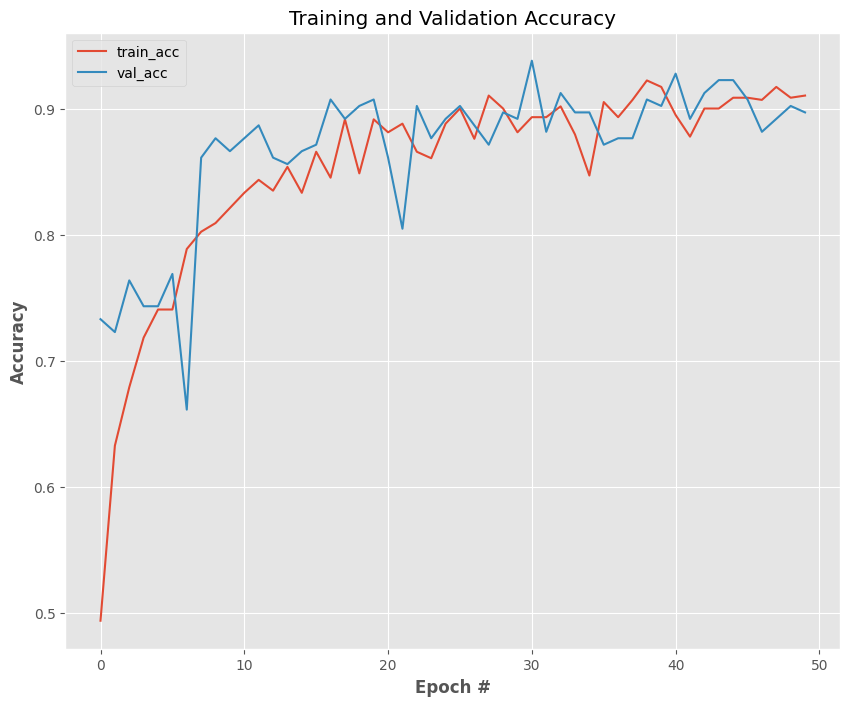

In [22]:

N = np.arange(0, EPOCH )
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()



# Plot the Training and Validation Loss

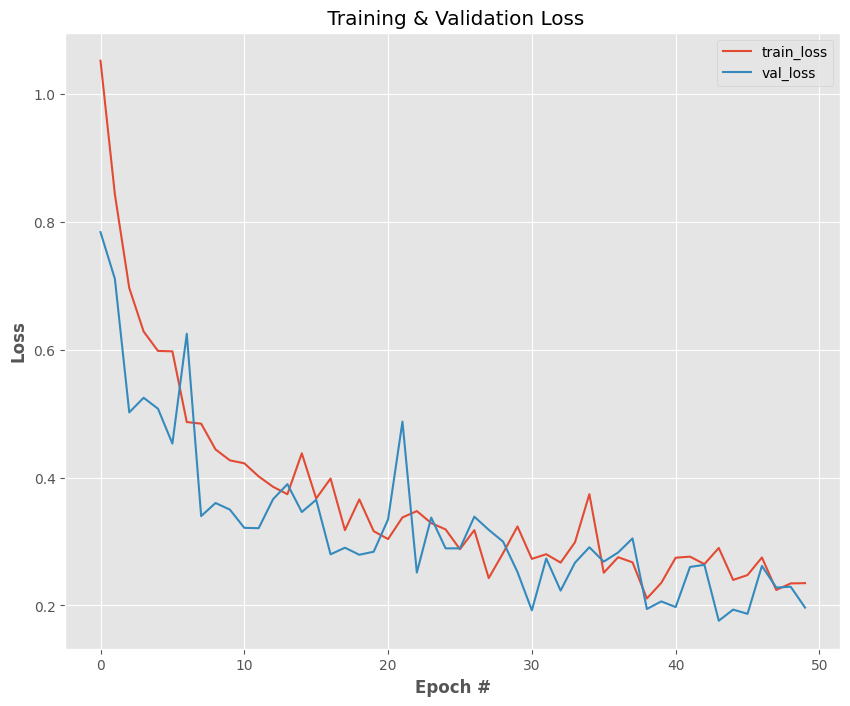

In [21]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title(" Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()


# Confusion matrix for this model

7/7 [==============================] - 1s 8ms/step


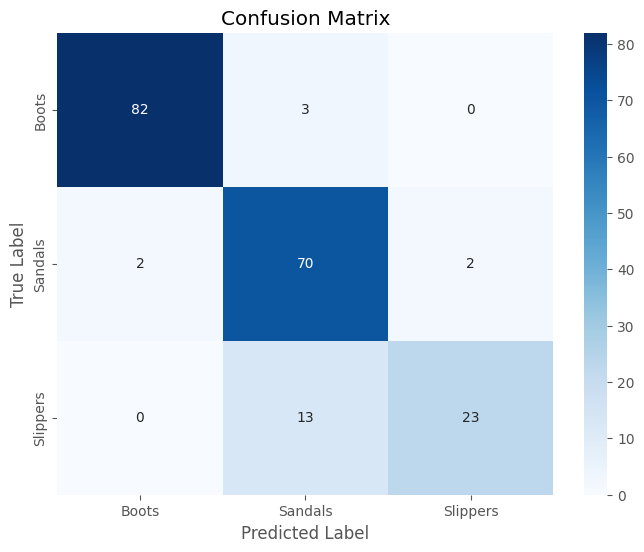

In [19]:
# predict classes for test set
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testY, axis=1)

# generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Boots', 'Sandals', 'Slippers'],
            yticklabels=['Boots', 'Sandals', 'Slippers'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#Predicting on the unseen test folder data

In [20]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

import imutils




# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 2 categorical folders

all_class = ["Boots", "Sandals", "Slippers"]


# progress bar
with tqdm(total=len(testImagePaths)) as pbar:

    for imagePath in testImagePaths:

        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf= model.predict(image)[0] # [[0.1 , 0.8 , 0.1]]
        print(prd_conf)

        # build the label
        label = all_class[np.argmax(prd_conf)] #[b f s]-> f
        proba = prd_conf[np.argmax(prd_conf)] # [0.1 , 0.8 , 0.1]  -> 0.8

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)

        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
def predict_image(image):
    #ptr-process for Image Classification
    image = cv2.resize(image, (28,28))
    image = image.astype("float")/255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    preds = model.predict(image)[0]
    result = dict()
    result['Boots']=round(float(list(preds)[0]), 3)
    result['Sandals']=round(float(list(preds)[1]), 3)
    result['Slippers']=round(float(list(preds)[2]), 3)


    print(result)
    return result

In [31]:
import gradio as gr
im = gr.Image()
label = gr.Label(num_top_classes=3)
gr.Interface(fn=predict_image, inputs=im, outputs=label, title="CNN").launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c7507362ad6472ccf1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 30ms/step
{'Boots': 0.818, 'Sandals': 0.18, 'Slippers': 0.002}
1/1 [==============================] - 0s 18ms/step
{'Boots': 0.001, 'Sandals': 0.053, 'Slippers': 0.946}
1/1 [==============================] - 0s 18ms/step
{'Boots': 0.005, 'Sandals': 0.127, 'Slippers': 0.868}
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c7507362ad6472ccf1.gradio.live


**The model achieved a test accuracy of 89.74%.
Looking at the prediction above, we can see that the model is generally good at distinguishing between the three classes.**
